<a href="https://colab.research.google.com/github/KevinUnedo/machine-learning-clustering/blob/main/Group11_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing library**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

**Importing file**

In [6]:
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [7]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [10]:
plt.style.use('fivethirtyeight')

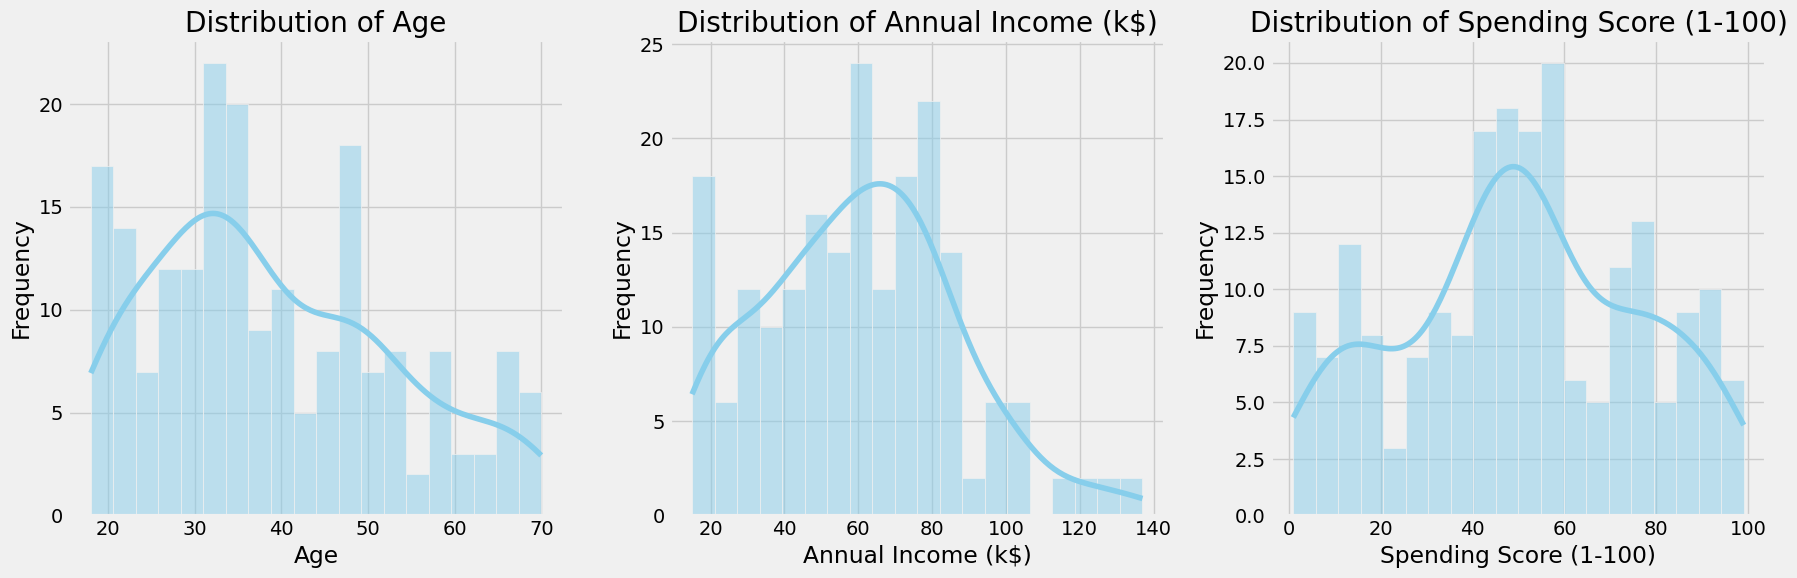

In [13]:
plt.figure(figsize=(18, 6))

for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

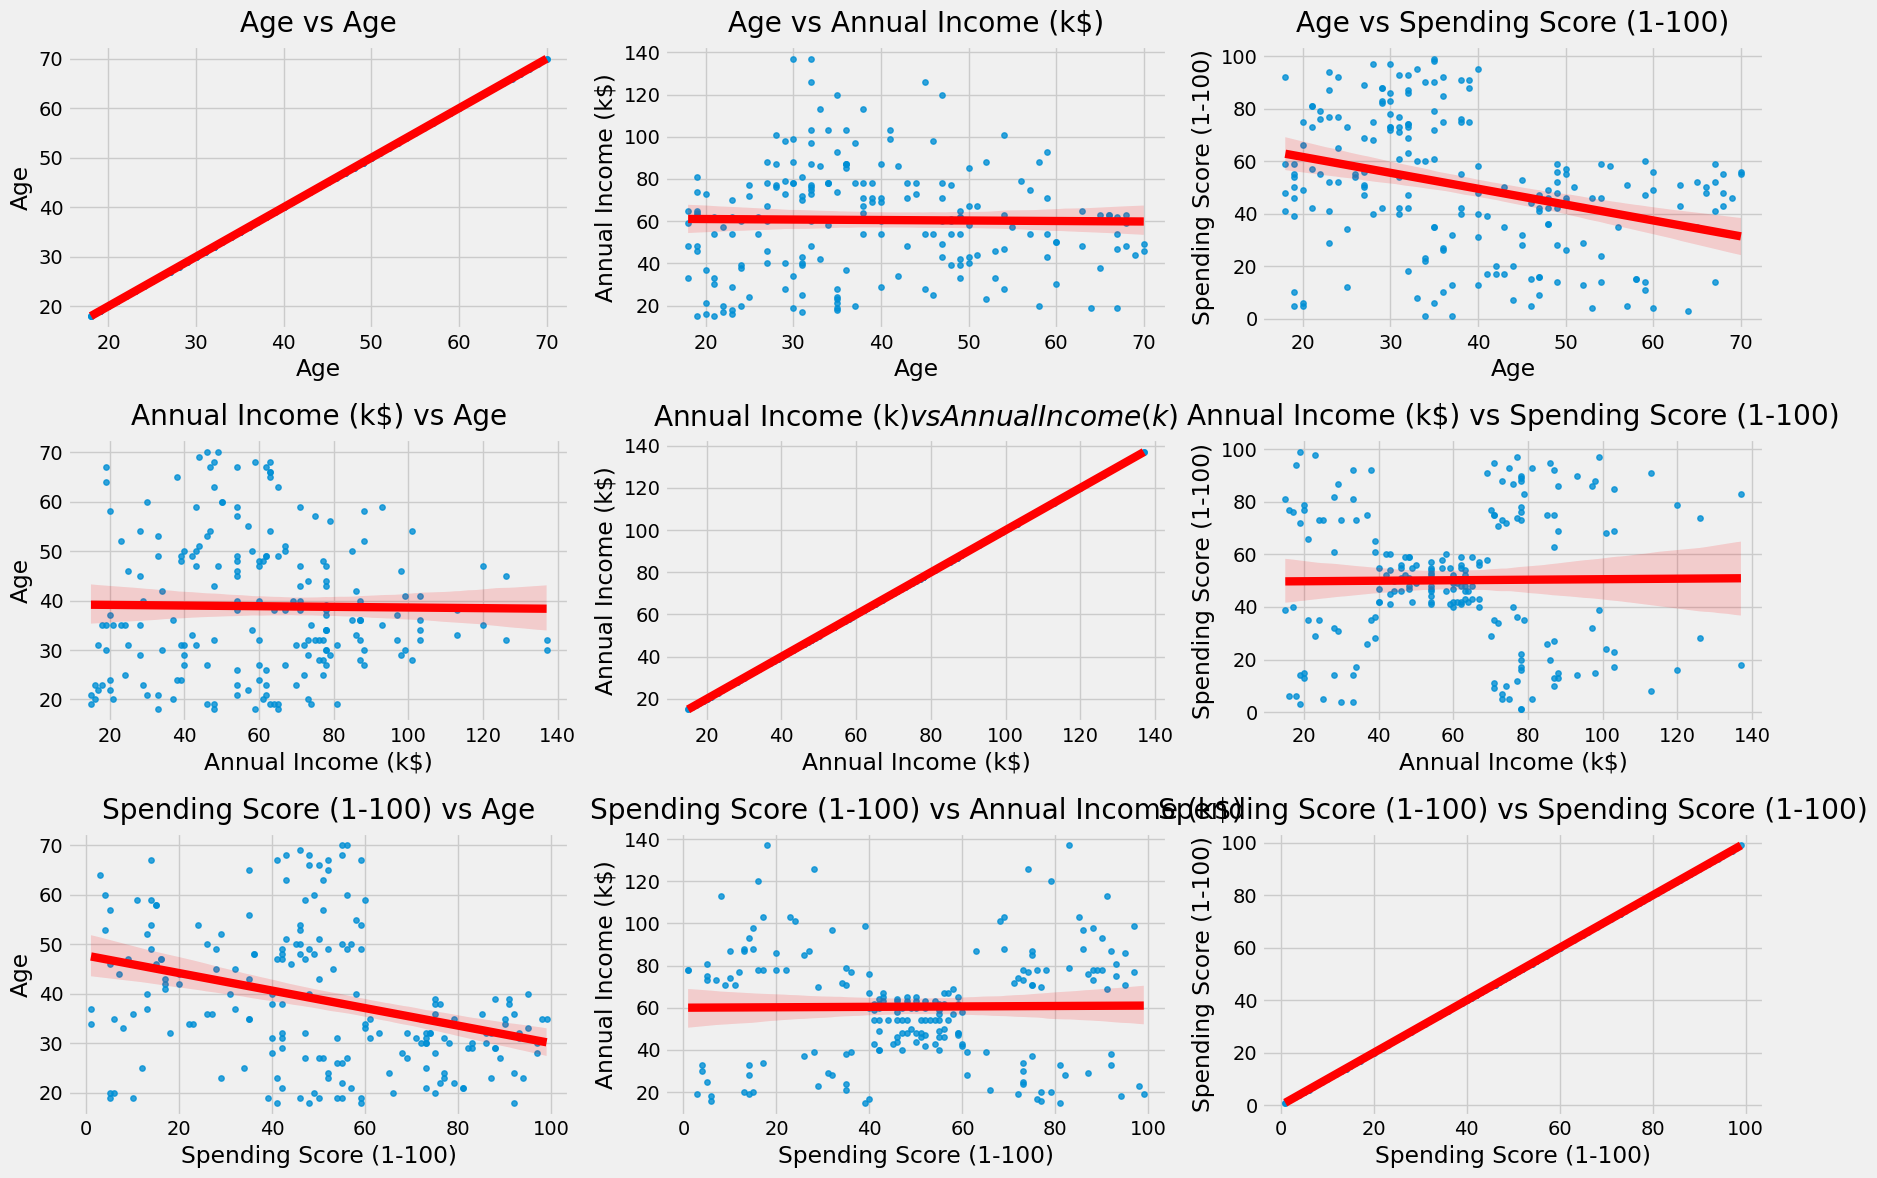

In [19]:
plt.figure(figsize=(18, 12))

for i, x in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    for j, y in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df, scatter_kws={'s': 15}, line_kws={'color': 'red'})
        plt.title(f'{x} vs {y}', pad=10)  # Added 'pad' to adjust title position
        plt.xlabel(x)
        plt.ylabel(y)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()